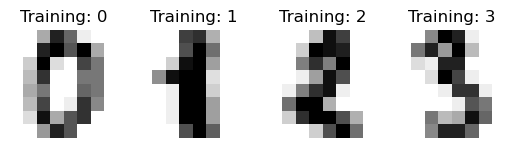


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                  5.1               3.5                1.4               0.2       0
50                 7.0               3.2                4.7               1.4       1
100                6.3               3.3                6.0               2.5       2
貝氏分類器進行數字(Digit)影像預測: [3 8 7 7 3 0 7 0 9 1 6 0 7 3 9 1 8 8 6 7 8 8 2 1 8 4 6 6 1 8]
數字(Digits)影像值實質: [3 3 5 7 3 0 7 0 1 1 6 0 7 3 1 1 8 8 6 8 9 8 2 1 8 4 6 6 1 8]
數字(Digits)影像預測準確率 0.88
貝氏分類器進行IRIS預測: [0 0 2 0 2 2 0 2 0 2 0 2 0 1 2 1 2 1 1 1 2 2 2 1 1 2 1 0 2 1]
IRIS真實值: [0 0 2 0 2 2 0 2 0 2 0 2 0 1 2 1 2 2 1 1 2 2 2 1 1 2 1 0 2 1]
IRIS影像預測準確率 0.97


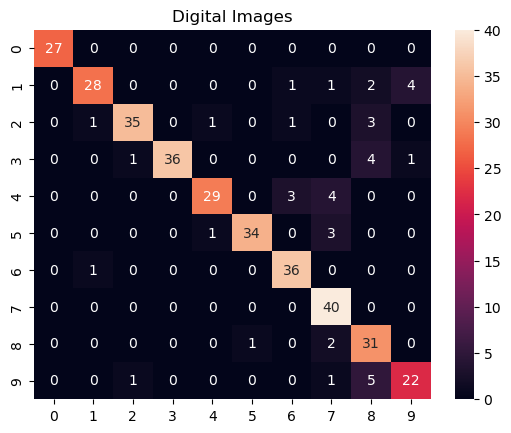

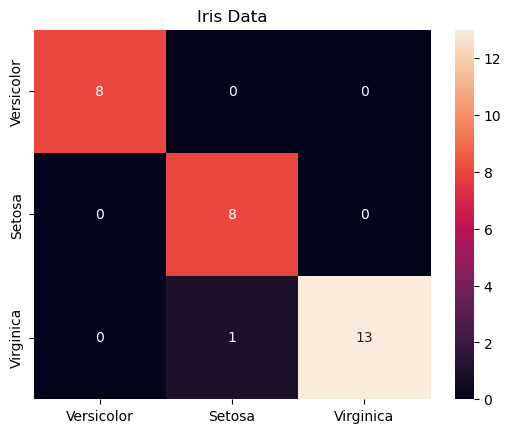

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

def load_datasets():
    return datasets.load_digits(),datasets.load_iris()

def BayesImage(data):

    gnb = GaussianNB()
    n_samples = len(data.images) #data.images 是 (n_samples, 8, 8)
    data_images = data.images.reshape((n_samples, -1)) #reshape((n_samples, -1)) 會把 8×8 影像轉換成 64 維向量，結果形狀變成 (n_samples, 64)
    train_data, test_data, train_label, test_label = train_test_split(data_images, data.target, test_size=0.2)
    clf = gnb.fit(train_data,train_label)
    #joblib.dump(clf,'BayesImage.joblib')
    print("貝氏分類器進行數字(Digit)影像預測:" , clf.predict(test_data)[:30])
    print("數字(Digits)影像值實質:" , test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("數字(Digits)影像預測準確率", round(acc,2)) #保留小數點後2位
    show_confusion_matrix(test_label, clf.predict(test_data), title='Digital Images')


def BayesValue(data):
    gnb = GaussianNB()
    train_data, test_data, train_label, test_label = train_test_split(data.data, data.target, test_size=0.2)

    clf = gnb.fit(train_data,train_label)
    #joblib.dump(clf,'BayesValue.joblib')

    print("貝氏分類器進行IRIS預測:" , clf.predict(test_data)[:30])
    print("IRIS真實值:" , test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("IRIS影像預測準確率", round(acc, 2))
    show_confusion_matrix(test_label, clf.predict(test_data), title='Iris Data', class_names=['Versicolor', 'Setosa', 'Virginica'])

def show_digits_images(data):
    for i in range(0, 4):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        imside = int(np.sqrt(data.data[i].shape[0]))
        im1 = np.reshape(data.data[i], (imside, imside)) #data.data[i] 是 (64,)，它需要轉回 (8,8) 來繪製影像
        plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: {}'.format(data.target[i]))
    plt.show()
    print()

def describe_iris_data():
  data = datasets.load_iris(as_frame=True)
  frame = data.frame.drop_duplicates('target') #刪除 target 欄位的重複值，確保 target = 0, 1, 2 各 只保留第一筆出現的數據
  pd.set_option('expand_frame_repr', False) # DataFrame 輸出時不會被折行（自動換行）
  print(frame.head())


def show_confusion_matrix(label, prediction, title=None, class_names=None):
    m = confusion_matrix(label, prediction)
    fig, ax = plt.subplots()
    if class_names is not None:
      sns.heatmap(m, annot=True, xticklabels=class_names, yticklabels=class_names)
    else:
      sns.heatmap(m, annot=True)

    if title is not None:
      ax.set_title(title)



digits,iris = load_datasets()
#print("IRIS 特徵： \n", iris.data )
#print("IRIS 真實值： \n", iris.target )

#print("Digit 特徵： \n", digits.data )
#print("Digit 真實值： \n", digits.target )

show_digits_images(digits)
describe_iris_data()
print('='*80)
BayesImage(digits)
BayesValue(iris)